[Video Youtube pt1](https://www.youtube.com/watch?v=czDowZE6OuI)
[Video Youtube pt1](https://www.youtube.com/watch?v=bLGI-Ky5UsY)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
plt.style.use('ggplot')

https://www.kaggle.com/terminus7/pokemon-challenge#pokemon.csv<br>
O objetivo é desenvolver um modelo para prever o resultado de batalhas entre pokemons.

# Importando e visualizando as tabelas

In [3]:
pokemon_df = pd.read_csv('pokemon.csv')
combat_df = pd.read_csv('combats.csv')

In [4]:
display(pokemon_df.head())
display(pokemon_df.shape)
display(pokemon_df.info())
display(pokemon_df.describe())

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


(800, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


None

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
display(combat_df.head())
display(combat_df.shape)
display(combat_df.info())
display(combat_df.describe())

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


(50000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


None

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


Renomeamos as colunas para facilitar a manipulação

In [6]:
pokemon_df.columns = ['id', 'name', 'type_1', 'type_2', 'hp', 'atk', 'def', 
                  'speed_atk', 'speed_def', 'speed', 'gen', 'legendary']

In [7]:
combat_df.columns = ['first_pokemon', 'second_pokemon', 'winner']

Criamos uma nova coluna booleana para definir apenas se o primeiro pokemon ganhará. Este será o nosso objetivo de predição.

In [8]:
combat_df['first_wins'] = combat_df['first_pokemon'] == combat_df['winner']

# Separando os dados de treino e teste

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(combat_df, test_size=0.2, random_state=22)
train = train.copy()
test = test.copy()

In [10]:
pokemon_df[pokemon_df['name'].isnull()==True]

,id,name,type_1,type_2,hp,atk,def,speed_atk,speed_def,speed,gen,legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


# Usando informações para modificar as tabelas

In [11]:
pokemon_df['total'] = pokemon_df['hp'] + pokemon_df['atk'] + pokemon_df['def'] \
                    + pokemon_df['speed_atk'] + pokemon_df['speed_def'] + pokemon_df['speed']

In [12]:
train.head()

,first_pokemon,second_pokemon,winner,first_wins
10496,766,76,766,True
46094,435,235,435,True
46391,129,327,327,False
27110,190,743,743,False
13240,339,697,339,True


Criamos um novo dataframe para unir ao dataframe pokemon_df. Neste novo dataframe calcularemos a quantidade de batalhas, de vitórias e a taxa de vitórias de cada pokemon

In [13]:
n_fights = train['first_pokemon'].value_counts() + train['second_pokemon'].value_counts()
n_wins = train['winner'].value_counts()

In [14]:
fights_df = pd.DataFrame()

In [15]:
fights_df['fights'] = n_fights
fights_df['wins'] = n_wins
fights_df['win_ratio'] = fights_df['wins'] / fights_df['fights']

In [16]:
fights_df['id'] = fights_df.index

Faremos a junção das tabelas, mantendo os valores faltantes

In [17]:
pokemon_df = pokemon_df.merge(fights_df, on='id', how='outer')

In [18]:
pokemon_df.sort_values(by='win_ratio', ascending=False).head()

,id,name,type_1,type_2,hp,atk,def,speed_atk,speed_def,speed,gen,legendary,total,fights,wins,win_ratio
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615,97.0,95.0,0.979381
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,510,96.0,94.0,0.979167
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495,94.0,92.0,0.978723
262,263,Raikou,Electric,NaN,90,85,75,115,100,115,2,True,580,78.0,76.0,0.974359
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,530,105.0,101.0,0.961905


# Tratando dados faltantes

In [19]:
pokemon_df[pokemon_df['win_ratio'].isna()]

,id,name,type_1,type_2,hp,atk,def,speed_atk,speed_def,speed,gen,legendary,total,fights,wins,win_ratio
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,300,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,435,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,300,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,465,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,288,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,390,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505,105.0,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,500,NaN,NaN,NaN


O pokemon 'Shuckle' tem 105 batalhas e nenhuma vitória

In [20]:
pokemon_df.loc[230, 'win_ratio'] = 0

Substituimos o 'win_rate' dos pokemons que não possuem nehuma batalha pela media dos pokemons com 'Total' numa faixa de +-10 do pokemon atual

In [21]:
mean = pokemon_df['total'].apply(lambda x: pokemon_df.loc[
    (x - 10 <= pokemon_df['total']) & (pokemon_df['total'] <= x + 10)]['win_ratio'].mean())

In [22]:
pokemon_df['win_ratio'].fillna(mean, inplace=True)

Conferindo se nosso preenchimento foi correto

In [23]:
(mean[11], 
 pokemon_df.loc[(530 - 10 <= pokemon_df['total']) & (pokemon_df['total'] <= 530 + 10)]['win_ratio'].mean(),
 pokemon_df.iloc[11]['win_ratio'])

(0.6199543836458984, 0.6199543836458984, 0.6199543836458984)

Não precisamos mais das features 'fights' e 'wins'

In [24]:
pokemon_df.drop(columns=['fights', 'wins'], axis=1, inplace=True)

In [25]:
pokemon_df.head(10)

,id,name,type_1,type_2,hp,atk,def,speed_atk,speed_def,speed,gen,legendary,total,win_ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0.280374
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0.385417
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,0.698113
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,0.587629
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0.522222
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405,0.580645
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534,0.872727
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634,0.851852
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634,0.837838
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314,0.163043


# Unindo as tabelas

In [26]:
from sklearn.base import TransformerMixin

Criamos um transformador. Nesse transformador, uniremos o dataframe 'combat_df' com 'pokemon_df', em ambos 'first_pokemon' e 'second_pokemon'

In [27]:
class Merger(TransformerMixin):
    def fit(self, X, y=None):
        # não precisamos destas colunas após a uniao
        self.columns = ['first_pokemon', 'second_pokemon', 'winner', 
                                'id_first_pokemon', 'name_first_pokemon', 
                                'id_second_pokemon', 'name_second_pokemon']
        # como identificaremos os dados do primeiro de do segundo pokemon
        self.suffixes = ('_first_pokemon', '_second_pokemon')
        return self
    def transform(self, X, y=None):
        X = X.merge(pokemon_df, left_on='first_pokemon', right_on='id')
        X = X.merge(pokemon_df, left_on='second_pokemon', 
                    right_on='id', suffixes=self.suffixes)
        X.drop(self.columns, axis=1, inplace=True)
        # transformamos a coluna de booleana para 1 e 0
        X['first_wins'].replace([True, False], [1, 0], inplace=True)
        return X

In [28]:
merger = Merger()
train = merger.fit_transform(train)
test = merger.transform(test)

In [29]:
train.head()

,first_wins,type_1_first_pokemon,type_2_first_pokemon,hp_first_pokemon,atk_first_pokemon,def_first_pokemon,speed_atk_first_pokemon,speed_def_first_pokemon,speed_first_pokemon,gen_first_pokemon,...,hp_second_pokemon,atk_second_pokemon,def_second_pokemon,speed_atk_second_pokemon,speed_def_second_pokemon,speed_second_pokemon,gen_second_pokemon,legendary_second_pokemon,total_second_pokemon,win_ratio_second_pokemon
0,1,Electric,Normal,62,55,52,109,94,109,6,...,50,75,35,70,30,40,1,False,300,0.232558
1,1,Electric,Normal,62,55,52,109,94,109,6,...,50,75,35,70,30,40,1,False,300,0.232558
2,0,Normal,Fairy,50,20,40,20,40,20,3,...,50,75,35,70,30,40,1,False,300,0.232558
3,1,Fire,Fighting,64,78,52,78,52,81,4,...,50,75,35,70,30,40,1,False,300,0.232558
4,1,Water,NaN,50,65,64,44,48,43,2,...,50,75,35,70,30,40,1,False,300,0.232558


# Tratando dados Categoricos e Numericos

In [30]:
target = 'first_wins'
cat_features = ['type_1_first_pokemon', 'type_2_first_pokemon', 'type_1_second_pokemon', 'type_2_second_pokemon']
num_features = list(train.columns)
num_features.remove(target)
for cat in cat_features:
    num_features.remove(cat)

In [31]:
num_features

['hp_first_pokemon',
 'atk_first_pokemon',
 'def_first_pokemon',
 'speed_atk_first_pokemon',
 'speed_def_first_pokemon',
 'speed_first_pokemon',
 'gen_first_pokemon',
 'legendary_first_pokemon',
 'total_first_pokemon',
 'win_ratio_first_pokemon',
 'hp_second_pokemon',
 'atk_second_pokemon',
 'def_second_pokemon',
 'speed_atk_second_pokemon',
 'speed_def_second_pokemon',
 'speed_second_pokemon',
 'gen_second_pokemon',
 'legendary_second_pokemon',
 'total_second_pokemon',
 'win_ratio_second_pokemon']

Aplicamos a standardização apenas nas features numéricas

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[num_features] = scaler.fit_transform(train[num_features].values.astype('float'))
test[num_features] = scaler.transform(test[num_features].values.astype('float'))

Preenchemos os pokemons com tipo 2 faltante como sem segundo tipo

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='None')
train[train.columns] = imputer.fit_transform(train)
test[test.columns] = imputer.transform(test)

Tratamos os dados categoricos codificando-os para inteiros

In [34]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train[cat_features] = encoder.fit_transform(train[cat_features])
test[cat_features] = encoder.transform(test[cat_features])

In [35]:
train.head()

,first_wins,type_1_first_pokemon,type_2_first_pokemon,hp_first_pokemon,atk_first_pokemon,def_first_pokemon,speed_atk_first_pokemon,speed_def_first_pokemon,speed_first_pokemon,gen_first_pokemon,...,hp_second_pokemon,atk_second_pokemon,def_second_pokemon,speed_atk_second_pokemon,speed_def_second_pokemon,speed_second_pokemon,gen_second_pokemon,legendary_second_pokemon,total_second_pokemon,win_ratio_second_pokemon
0,1,3.0,13.0,-0.276037,-0.736922,-0.701970,1.107593,0.791856,1.398515,1.621513,...,-0.756221,-0.124848,-1.239569,-0.082602,-1.510613,-0.969721,-1.413754,-0.298376,-1.126381,-1.052229
1,1,3.0,13.0,-0.276037,-0.736922,-0.701970,1.107593,0.791856,1.398515,1.621513,...,-0.756221,-0.124848,-1.239569,-0.082602,-1.510613,-0.969721,-1.413754,-0.298376,-1.126381,-1.052229
2,0,12.0,4.0,-0.750356,-1.807270,-1.081153,-1.614506,-1.149777,-1.650538,-0.194766,...,-0.756221,-0.124848,-1.239569,-0.082602,-1.510613,-0.969721,-1.413754,-0.298376,-1.126381,-1.052229
3,1,6.0,5.0,-0.196984,-0.033551,-0.701970,0.159446,-0.718303,0.439262,0.410661,...,-0.756221,-0.124848,-1.239569,-0.082602,-1.510613,-0.969721,-1.413754,-0.298376,-1.126381,-1.052229
4,1,17.0,12.0,-0.750356,-0.431109,-0.322787,-0.880457,-0.862127,-0.862581,-0.800192,...,-0.756221,-0.124848,-1.239569,-0.082602,-1.510613,-0.969721,-1.413754,-0.298376,-1.126381,-1.052229


# Treinando e avaliando o algoritimo

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
X_train = train.drop(columns=target, axis=1)
y_train = train[target]
X_test = test.drop(columns=target, axis=1)
y_test = test[target]

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

O RandomizedSearchCV permite definir distribuições para os parametros, e este procura a melhor combinação sorteando valores dessas distribuições uma determinada quantidade de vezes

In [39]:
%%time
param_dist = {'n_estimators': randint(100, 1000), 'max_depth': randint(10, 100)}


clf_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, 
                                n_iter=5, cv=5, scoring='accuracy', refit=True)

clf_search.fit(X_train, y_train)

CPU times: user 8min 25s, sys: 662 ms, total: 8min 26s
Wall time: 8min 26s


In [40]:
print("Mean accuracy score:", clf_search.best_score_)
print("Best parameters:", clf_search.best_params_)

Mean accuracy score: 0.927925
Best parameters: {'max_depth': 74, 'n_estimators': 772}


In [41]:
y_pred = clf_search.predict(X_test)

print("Accuracy teste:", accuracy_score(y_test, y_pred))

Accuracy teste: 0.9454


Podemos visualizar a importância que nosso estimador atribuiu a cada feature

In [42]:
feature_importances = {
    'feature': X_train.columns,
    'importance': clf_search.best_estimator_.feature_importances_
}
feature_importances =  pd.DataFrame(data=feature_importances).sort_values(by='importance', ascending=False)

In [43]:
feature_importances

,feature,importance
11,win_ratio_first_pokemon,0.167538
19,speed_second_pokemon,0.161987
7,speed_first_pokemon,0.159942
23,win_ratio_second_pokemon,0.152326
22,total_second_pokemon,0.039533
10,total_first_pokemon,0.039257
15,atk_second_pokemon,0.028056
3,atk_first_pokemon,0.027228
5,speed_atk_first_pokemon,0.022063
17,speed_atk_second_pokemon,0.021740


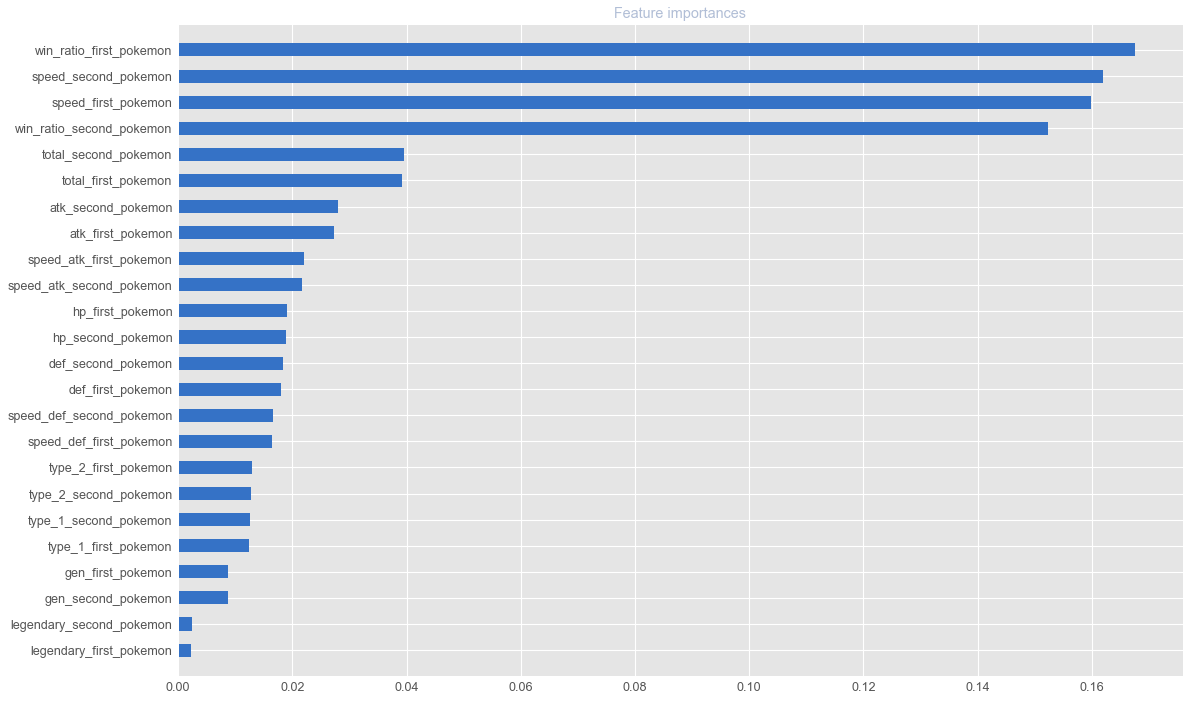

In [44]:
plt.figure(figsize=(18,12))
plt.title("Feature importances")
plt.barh(y=range(feature_importances.shape[0]), 
         width=np.flip(feature_importances['importance'].values),
         height=0.5,
         color="b", align="center")

plt.yticks(range(feature_importances.shape[0]),
          np.flip(feature_importances['feature']))
plt.ylim([-1, feature_importances.shape[0]])
plt.show()

Produzido por: Matheus Xavier